# Linear Methods for Regression

* A linear regression model assumes that the regression function $E(Y|X)$ is
linear in the coeficients $B_1, ..., B_p$.

* They are simple and often provide an adequate and interpretable description of how the inputs affect the output.

* For prediction purposes they can sometimes outperform fancier nonlinear models, especially in situations with small numbers of training cases, low signal-to-noise ratio or sparse data

## Linear Regression Models and Least Squares

We have an input vector $X^T = (X_1, X_2, ..., X_p)$,
and want to predict a real-valued output $Y$ . The linear regression model
has the form
$$f(x)=B_0 + \sum_{j = 2}^pX_jB_j$$

$B_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come
from different sources:

* quantitative inputs;
* transformations of quantitative inputs, such as log, square-root or
square;
* basis expansions, such as $X_2 = X_{1}^{2}$, $X_3 = X_{1}^{3}$, leading to a polynomial
representation
* dummy coding of the levels of qualitative inputs.
* interactions between variables, for example, $X_3 = X_1 X_2$

Given a set of training data $(x_1, y_1) ... (x_N , y_N)$ from which
to estimate the parameters $\beta$. Each $x_i = (x_{i1}, x_{i2}, ... , x_{ip})^T$ is a vector
of feature measurements for the ith case. 

The most popular estimation method is least squares, in which we pick the coefficients $β = (β_0, β_1, . . . , β_p)T$
to minimize the residual sum of squares.

$$RSS(\beta)= \sum_{i=1}^{N} (y_i - \beta_0 - \sum_{j=1}^{p}x_{ij}\beta_j)$$

From a statistical point of view, this criterion is reasonable if $X_1, ... , X_n$ are independent r.v.s sample.

Even if the $x_i$'s were not drawn randomly, the criterion is still valid if the $y_i’s$ are conditionally independent given the inputs $x_i$

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from matplotlib import cm
import os, glob

In [89]:
# We simulate X's features. 2 features
# We make a linear transformation.
# Recall, Z ~ N(0, 1) -> X ~ N(1.6, 64)

sample_size = 500
z = np.random.randn(sample_size, 2)
sigma = 8
mu = 1.6
x = sigma*z + mu

# Betas: b = [B0, B1]
b = np.array([1.6, 0.8])

# Error: e ~ N(0, 1) 
e = np.random.randn(sample_size)

# Function: f = B0 + B1.X1 + B2.X2 
f = 1.5 + np.sum(b*x, axis=1)

# Output: y = B0 + B1.X1 + B2.X2 + e
y = f + e

The quantity of betas have effects on $y$. 

In [77]:
# Grid 
x1_range = np.linspace(x[:,0].min(), x[:,0].max(), sample_size)
x2_range = np.linspace(x[:,1].min(), x[:,1].max(), sample_size)
x1, x2 = np.meshgrid(x1_range, x2_range)

# f in 2d
f_sorted,_ = np.meshgrid(np.sort(f), np.sort(f))

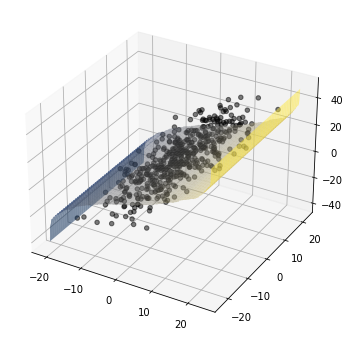

In [57]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y, alpha = 0.5, color = 'k')
ax.plot_surface(x1, x2, f_sorted, alpha = 0.5, cmap = cm.cividis)
plt.show()

Denote by $X$ the $N × (p + 1)$ matrix with each row an input vector (with a 1 in the first position), and similarly let
y be the $N$-vector of outputs in the training set. Then we can write the
residual sum-of-squares as

$$RSS(β) = (y − Xβ)^T (y − Xβ)$$

This is a quadratic function in the $p + 1$ parameters. Differentiating with
respect to $β$ we obtain:

$$\frac{∂RSS}{∂β} = −2X^T (y − Xβ)$$

$$\frac{∂^2RSS}{∂∂β^T} = 2X^T X$$

We suppose that $X$ has full column rank, and hence $X^TX$
is positive definite. The derivative is equal to 0. This result in 
$$\hat{β} = (X^TX)^{−1}X^T y$$

The predicted values are:
$$\hat{y} = X\hat{β} = X(X^TX)^{−1}X^Ty$$

where the matrix $H = X(X^T X)^{−1}X^T$ is called hat

When minimize $RSS(β) = ||y − Xβ||^2$ by choosing $\hat{β}$ so that the residual vector $y − \hat{y}$ is orthogonal to this subspace

It might happen that the columns of $X$ are not linearly independent, so that $X$
 is not of full rank However, the fitted values $\hat{y} = X\hat{β}$ are still the projection of $y$ onto the column space of $X$

Property of $\hat{β}$

* $Var(\hat{β}) = (X^TX)^{−1}σ^2$

Estimates of the variance $\sigma^2$ by

* $\sigma^2 = \frac{1}{N − p − 1} \sum_{i =1}^{N}(y_i − \hat{y}_i)^2.$

To draw inferences about the parameters and the model, additional assumptions are needed 

$$Y = B_0 + \sum_{j = 2}^pX_jB_j + \epsilon$$

where $\epsilon$ ~ $N(0, \sigma^2)$

We can show
$$\hat{β} ∼ N(β, (X^TX)^{−1}σ^2)$$

This is a multivariate normal distribution with mean vector and variance–
covariance matrix as shown. 

Also $(N − p − 1)σ^2$ ~ $σ^2χ^2_{N−p−1}$ a chi-squared distribution with $N − p − 1$ degrees of freedom. 

We use these distributional properties to form tests of hypothesis and confidence intervals for the parameters $β_j$

To test the hypothesis that a particular coefficient $β_j = 0$, we form the standardized coefficient or $Z-score$

$$z_i = \frac{β_j}{\hat{σ}\sqrt{v_j}}$$

Where $v_j$ is the $jth$ diagonal element of $(X^T X)^{−1}$. Under the null hypothesis that $β_j = 0$, $z_j$ is distributed as $t_{N−p−1}$ (a t distribution with $N − p − 1$ degrees of freedom), and hence a large (absolute) value of $z_j$ will lead to rejection of this null hypothesis. 

The difference between the tail quantiles of a t-distribution and a standard normal become negligible
as the sample size increases

Often we need to test for the significance of groups of coefficients simultaneously.

Here we use the $F$ statistic

$$F = \frac{(RSS_0 − RSS_1)/(p_1 − p_0)}{RSS_1/(N − p_1 − 1)}$$

the $F$ statistic will have a $F_{p_1−p_0, N − p_1−1}$ distribution

Similarly, we can isolate $β_j$ in (3.10) to obtain a $1−2α$ confidence interval for $β_j$. 
$$(\hat{β_j} − z^{(1−α)}v_j^{1/2}\hat{σ}, \hat{β_j} + z^{(1−α)}v_j^{1/2}\hat{σ})$$

Here $z^{(1−α)}$ is the $1 − α$ percentile of the normal distribution:
* $z^{(1−0.025)} = 1.96$,
* $z^{(1−.05)} = 1.645$, etc.

Hence the standard practice of reporting $\hat{β} ± 2 · se(\hat{β})$ amounts to an approximate 95% confidence interval. Even if the Gaussian error assumption does not hold, this interval will be approximately correct, with its coverage approaching $1 − 2α$ as the sample size $N → ∞.$

In [48]:
data = pd.read_stata('MLB1.dta')

features = ['years', 'gamesyr', 'bavg', 'hrunsyr', 'rbisyr']
target = 'salary'

X = data.get(features)
y = np.log(data.get(target))

Model:

$$log(salary)  = B_0 + B_1years + B_2gamesyr + B_3bavg + B_4hrunsyr + B_5rbisyr + u$$

In [51]:
# using Statsmodels

import statsmodels.api as sm

# we need to add a constant
X = sm.add_constant(X, prepend=False)
mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           2.94e-72
Time:                        15:00:21   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
years          0.0689      0.012      5.684      0.0

Here we can compute the *test hypothesis* individual and join. 

*Subset Selection*. This can be achieved searching the subset of features in which the model maximize some criterior of information, like Akaike. That is, it is the best combination of features that maximize some criterium of information.

This can decrease the error, that is loss function reducing the biased.

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [84]:
# Using Sklearn

from sklearn.linear_model import LinearRegression


X = data.get(features)
y = np.log(data.get(target))

lin_reg = LinearRegression()
# don't need add constant
lin_reg.fit(X, y)

def model_print(model, target_print:str):
    print(f'{target_print} = ' + str(round(model.intercept_, 4)) + ' + '+\
          ('{} '+' + {} '.join(list(model.feature_names_in_))).format(*model.coef_.round(4)))

model_print(lin_reg, 'log(salary)')

log(salary) = 11.1924 + 0.0689 years + 0.0126 gamesyr + 0.001 bavg + 0.0144 hrunsyr + 0.0108 rbisyr


In [85]:
def metrics_model(y_true, model, X):
    mape = metrics.mean_absolute_percentage_error(y_true, model.predict(X))
    print(f'The Mean Absolute Error is {mape:.2}')

In [86]:
metrics_model(y, lin_reg, X)

The Mean Absolute Error is 0.041


## Shrinkage Methods

### Ridge Regression

$$\hat{\beta}^{ridge} = argmin\{\sum_{1}^{N} (y_i - B_0 - \sum_{j = 1}^{p}x_{ij}\beta_j)^2 + (\lambda \sum_{j = 1}^{p}\beta_j^2))\}$$

$$Or$$

$$\hat{\beta}^{ridge} = argmin\{\sum_{1}^{N} (y_i - B_0 - \sum_{j = 1}^{p}x_{ij}\beta_j)^2\}$$
$$ subject to(\lambda \sum_{j = 1}^{p}\beta_j^2)<t$$

Here λ ≥ 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of λ, the greater the amount of shrinkage.

* When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance.
* A wildly large positive coefficient on one variable can be canceled by asimilarly large negative coefficient on its correlated cousin.
* By imposing a size constraint on the coefficients, as in (3.42), this problem is alleviated

Whe We include $\lambda \sum_{j = 1}^{p}\beta_j^2$ (regularization term) in Loss function this called **L1 Regularization**

# The Lasso
The lasso is a shrinkage method like ridge, with subtle but important differences. The lasso estimate is defined by

$$\hat{\beta}^{lasso} = argmin \sum_{i = 1}^{N} (y_i - B_0 - \sum_{j = 1}^{p} x_{ij}\beta_{j})^2$$

$$subject\: to$$

$$ \lambda \sum_{j = 1}^{p}|\beta_j|<t$$


When we include $ \lambda \sum_{j = 1}^{p}|\beta_j|<t$ (regularization term) in Loss function this called **L2 Regularization**



In [87]:
from sklearn.linear_model import Lasso, LassoCV

In [88]:
# alpha by default is 1

lasso_model = Lasso()
lasso_model.fit(X, y)
model_print(lasso_model, 'log(salary)')

log(salary) = 11.429 + 0.0 years + 0.0161 gamesyr + 0.0005 bavg + 0.0 hrunsyr + 0.0138 rbisyr


In [89]:
metrics_model(y, lasso_model, X)

The Mean Absolute Error is 0.045


In [102]:
# cross validation for alpha 

lasso_model_cv = LassoCV(cv=5, alphas= np.linspace(0.000001, 5, 50))
lasso_model_cv.fit(X, y)
metrics_model(y, lasso_model_cv, X)

The Mean Absolute Error is 0.041


In [104]:
print(f'Alpha chossen {lasso_model_cv.alpha_}')

Alpha chossen 1e-06


Resources:

* The Elements of Statistical Learning Data Mining, Inference, and Prediction - Second Edition - Trevor Hastie - Robert Tibshirani - Jerome Friedman. Springer.

* Data Page: https://hastie.su.domains/ElemStatLearn/
